In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/CNN/'

dataset				    Vehicle_Data_Image_Classification.ipynb
dataset_Image_Classification.ipynb  Vehicle_Data_Saved_model.ipynb
dataset_Load_Saved_model.ipynb	    Vehicle_Trained_Model_S128E20.h5
dataset_S256E20.h5		    Vehicle_Trained_Model_S128E25.h5
my_model.h5			    Vehicle_Trained_Model_S256E15.h5
Sports_Celebrity_Data		    Vehicle_Trained_Model_S256E25.h5
Vehicle_Data			    Vehicle_Trained_Model_S64E20.h5


In [3]:
model_path = '/content/drive/My Drive/CNN/'

In [4]:
from tensorflow import keras


model = keras.models.load_model(model_path+'Vehicle_Trained_Model_S128E20.h5')

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Creating dictionaries to map folder names

name_mapping_dict = {'bus': 0,
                     'cycle': 1,
                     'bike': 2,
                     'plane': 3,
                     'scooty': 4,
                     'helicopter': 5,
                     'car': 6,
                     'truck': 7,
                     'boat':8
                     }


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'bus', 1: 'cycle', 2: 'bike', 3: 'plane', 4: 'scooty', 5: 'helicopter', 6: 'car', 7: 'truck', 8: 'boat'}


In [8]:
img_size = 128

In [11]:
img = plt.imread('a.jpg')
img = cv2.resize(img, (img_size, img_size))


img.shape

(128, 128, 3)

In [12]:
temp_img = np.expand_dims(img, axis=0)

temp_img.shape

(1, 128, 128, 3)

Model prediction: helicopter


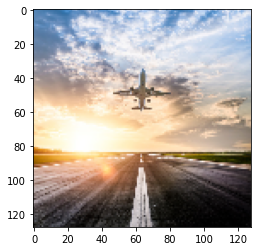

In [13]:
prediction = inv_name_mapping_dict[np.argmax(model.predict(temp_img)[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(img)
plt.show()

**Lets combine it in a function**

In [14]:
def test_func(model, img_size, img_name, class_name_mapping):
  img = plt.imread(img_name)
  img = cv2.resize(img, (img_size, img_size))

  temp_img = np.expand_dims(img, axis=0)
  
  prediction = class_name_mapping[np.argmax(model.predict(temp_img)[0])]
  print("Model prediction: {}".format(prediction))
  
  plt.imshow(img)
  plt.show()

Model prediction: plane


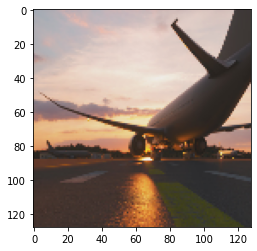

In [16]:
test_func(model, img_size=128, img_name='e.jpg', class_name_mapping=inv_name_mapping_dict)

Model prediction: car


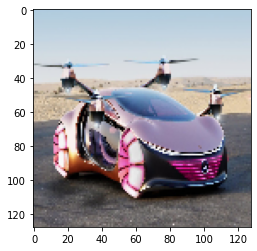

In [18]:
test_func(model, img_size=128, img_name='o.jpg', class_name_mapping=inv_name_mapping_dict)

Model prediction: bike


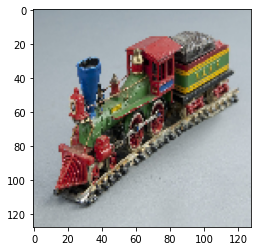

In [19]:
test_func(model, img_size=128, img_name='i.jpg', class_name_mapping=inv_name_mapping_dict)

Model prediction: boat


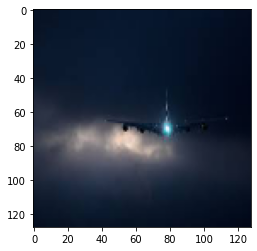

In [20]:
test_func(model, img_size=128, img_name='g.jpg', class_name_mapping=inv_name_mapping_dict)

Model prediction: plane


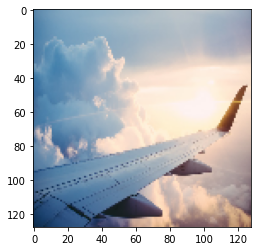

In [21]:
test_func(model, img_size=128, img_name='m.jpg', class_name_mapping=inv_name_mapping_dict)